In [2]:
import numpy as np
from matplotlib import pyplot as plt
import csv

class BinaryLogisticRegression:
    def __init__(self):
        self.b = None
        self.w = None
        self.loss_tape = []

    def sigmoid(self, x):
        return np.where(x >= 0, 1/(1+np.exp(-x)), np.exp(x)/(1+np.exp(x)))

    def predict(self, x):
        if len(x.shape) == 1:
            x = np.expand_dims(x, axis=-1)
        return self.sigmoid(self.b + x @ self.w)

    def fit(self, x, y_true, iters=3000, lr=0.01):
        if len(x.shape) == 1:
            x = np.expand_dims(x, axis=-1)
        if len(y_true.shape) == 1:
            y_true = np.expand_dims(y_true, axis=-1)

        n, p = x.shape

        self.w = np.random.randn(p, 1)
        self.b = np.random.randn(1, 1)

        for i in range(iters):
            y_pred = self.predict(x)

            # loss
            loss = (-y_true.T @ np.log(y_pred) -
                    (1 - y_true).T @ np.log(1 - y_pred))[0, 0] / n
            self.loss_tape.append(loss)

            # stop if diverging
            if i >= 3 and (loss > 1.05*self.loss_tape[-2] or np.isnan(loss)):
                break

            """
            why does not dividing by n in dL_dw and dL_db make the model so good?? or maybe overfit idk
            """
            error = y_pred - y_true          # (n, 1)
            dL_dw = (x.T @ error)     # (p, 1)
            dL_db = np.sum(error)           # scalar

            # update
            self.w -= lr * dL_dw
            self.b -= lr * dL_db


speed = []
ammo = []
result = []

with open("/content/zombies_data - Sheet1.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for line in csv_reader:
        try:
            speed.append(float(line[0]))
            ammo.append(float(line[1]))
            result.append(int(line[2]))
        except:
            pass

speed = np.array(speed, dtype=np.float64)
ammo = np.array(ammo, dtype=np.float64)
result = np.array(result)

speed_scale = np.max(speed) - np.min(speed)
ammo_scale = np.max(ammo) - np.min(ammo)

speed = speed / speed_scale
ammo = ammo / ammo_scale

reg = BinaryLogisticRegression()
# reg = LogisticRegression()
data = np.array([speed, ammo]).T
reg.fit(data, result)

tp = tn = fp = fn = 0
preds = reg.predict(data)
for i, elem in enumerate(result):
    if preds[i] > 0.5:
        if elem == 1:
            tp+=1
        elif elem == 0:
            fp += 1
    elif preds[i] <= 0.5:
        if elem == 1:
            fn += 1
        elif elem == 0:
            tn += 1

print(f"True Positive: {tp}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Negative: {tn}")

True Positive: 13
False Positive: 0
False Negative: 0
True Negative: 9


9.888582944869604 7.626590320628411 -10.168601982334039


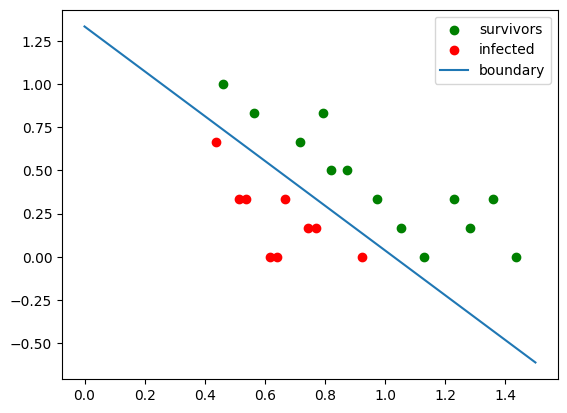

In [3]:
w1, w2 = reg.w[:, 0]
b = reg.b[0, 0]

print(w1, w2, b)

fig2 = plt.figure(2)
mask = result == 1
plt.scatter(speed[mask], ammo[mask], label="survivors", color="green")
plt.scatter(speed[~mask], ammo[~mask], label="infected", color="red")
plt.plot(np.linspace(0, 1.5, 10), np.linspace(0, 1.5, 10) * (-w1/w2) - b/w2, label="boundary")
plt.legend()
plt.show()

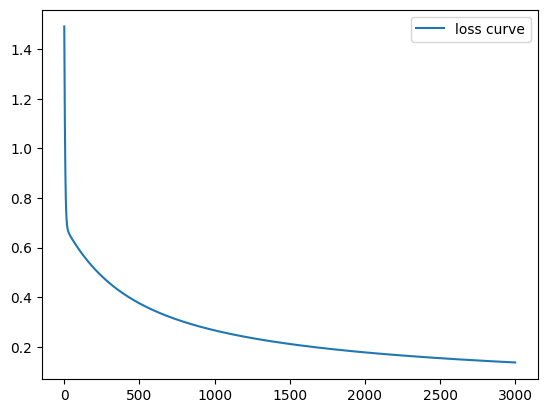

In [5]:
fig1 = plt.figure(1)
plt.plot(reg.loss_tape, label="loss curve")
plt.legend()
plt.show()